# Trabalho #4 - Processamento de dados com Pandas

Nesse trabalho você vai realizar o processamento de dados de pacientes com suspeita de doença cardiovascular e treinar uma RNA para identificar se o paciente tem ou não doença cardiovascular.

O conjunto de dados utilizado nesse trabalho consiste de uma modificação do conjunto de dados original "Cardiovascular Disease Dataset", disponível no Kaggle e que pode ser obtido no seguinte link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Coloque seu nome aqui:

Nome: 

## 1. Descrição dos dados

Nesse conjunto de dados existem 70.000 linhas. Cada linha descreve um paciente e cada coluna descreve uma característica. 

O objetivo desse problema é determinar se um paciente tem ou não doença cardiovascular dadas as informações fornecidas pelos paciente e pelos resultados de seus exames.

As características presentes em cada uma das colunas de dados são as seguintes:

1. Idade ("age") em dias 
2. Sexo ("gender"): 1 - masculino, 2 - feminino
2. Altura ("height") em cm
3. Peso ("weigth") em kg
4. Pressão systolica ("ap_hi") em mmHg
5. Pressão diastolica ("ap_lo") em mmHg
6. Colesterol ("cholesterol"): normal, high, very_high
7. Gicose ("glucose"): normal, high, very_high
8. Fumante ("smoking"): 0 - não fumante, 1 - fumante
9. Bebe álcool: 0 - não bebe, 1 - bebe
10. Atividade física ("activity"): 0 - não realiza, 1 - realiza
11. Presença de doença cardiovascular: 0 - não, 1 - sim

Ressalta-se que esse conjunto de dados é balanceado.

## 2. Objetivo do trabalho

O objetivo desse trabalho é processar os dados usando o Pandas e treinar uma RNA para identificar se os pacientes tem ou não doença cardiovascular.


####  Entrega do notebook:

- O notebook com a sua solução deve ser entregue no fomato pdf 

- Os resultados de todas as etapas devem ser apresentados

- As células que devem ser feitas nesse trabalho estão indicados por: "Para você fazer"

- Algumas células de programação estão incluídas para facilitar a verificação do seus cálculos. Esses resutados permitem você saber se realizou a tarefa corretamente ou não, cuidado para não apagá-las (ou salve o enunciado original em outro notebook).

## 3. Carregar os dados

O conjunto de dados está no arquivo `heart_disease.csv`. Como esse conjunto de dados está em um arquivo tipo CSV use o Pandas para importá-lo e carregar os dados em um dataframe. 

O arquivo já possui uma coluna de índice dos pacientes (`id`) , assim, use essa coluna como índice ao importar o arquivo.

In [1]:
import pandas as pd
data = pd.read_csv("heart_disease.csv", index_col='id')
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,1,156,85.0,140,90,very_high,normal,0,0,1,1
2,18857,1,165,64.0,130,70,very_high,normal,0,0,0,1
3,17623,2,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,1,156,56.0,100,60,normal,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,normal,normal,1,0,1,0
99995,22601,1,158,126.0,140,90,high,high,0,0,1,1
99996,19066,2,183,105.0,180,90,very_high,normal,0,1,0,1


**Saída esperada:**


| id | age	| gender | height |	weight| ap_hi| ap_lo | cholesterol| gluc | smoke | alco | active | cardio |
|-------|--------|--------|-------|------|-------|------------|------|-------|------|--------|--------|----|
| 0 | 18393	| 2 | 168 |	62.0 |	110	| 80 | normal |	normal | 0	| 0	| 1	| 0 |
| 1 |	20228 |	1| 156 |	85.0 |	140 |	90 |	very_high |	normal |	0 | 0 |	1 |	1 |
|2 | 18857 |	1 | 165 |	64.0 |	130 |	70 |	very_high |	normal| 0 |	0 |	0 | 1 |
|3 | 17623 |	2 |	169 |	82.0 | 150 |	100 |	normal |	normal |	0 |0 |	1 |	1 |
|4 |	17474 |	1 |	156 |	56.0 |	100 |	60 |	normal |	normal |	0 |	0 |	0 | 0 |
| ... |	... |	... |	... |	... |	... |	... |	... | ... |	... |	... |	... | ... |
70000 rows × 12 columns

## 4. Analisar os dados

A análise para verificar se os dados são coerentes deve ser realizada para cada característica, ou seja, para cada coluna, tendo em mente valores máximos e mínimos possíveis para cada característica.

Para esse conjunto de dados você deve realizar as seguintes verificações:

- verificar tipo de dados de cada coluna e calcula estaísticas básicas de cada coluna
- Verificar se existem valores não existentes;
- Verificar se as pressões altas ("ap_hi") são maiores do que as pressões baixas ("ap_lo") para todos os pacientes;
- Verificar se a pressão alta ("ap_hi") é menor do que 300 mmHg, pois não existe pressão mais alta do que isso;
- Verificar se a pressão baixa ("ap_lo") é maior do que 30 mmHg, pois não existe pressão mais baixa do que isso;
- Verificar peso máximo e mínimo. O peso dos pacientes deve estar entre 30 kg e 450 kg.
- Verificar altura mínima e máxima. A altura de um adulto não deve ultrapassar 250 cm e não deve ser menor do que 70 cm.

Caso encontre pacientes com dados fora de valores aceitáveis, as linhas correspondentes a esses pacientes devem ser retiradas.

Outras verificações podem e devem ser realizadas e fica a seu critério pensar no que se pode fazer para aprimorar os dados. Observe que dados incoerentes afetam o desempenho da RNA.

Abaixo segue um exemplo de código para verificar se a pressão alta ("ap_hi") é maior do que 300 mmHg e remover os pacientes com esse problema:

    index = data.index   # separa coluna de índices dos pacientes
    condition = data["ap_hi"]>300  # verifica se ap_hi é maior do que 300
    indph = index[condition]  # identifica pacientes com pressão maior do que 300
    print(data.loc[indph, "ap_hi"]) # apresenta pacientes com dados incoerentes
    data = data.drop(indph) # remove linhas correspondentes aos pacientes com dados incoerentes
    data # apresenta novo DataFrame


### Verificar tipos de dados de cada coluna

Use os métodos `info()` e `describe()` para fazer essa verificação usando o DataFrame completo. Os resultados desses comando fornece muita informação para processamento dos dados. 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null object
gluc           70000 non-null object
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 6.9+ MB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0
active,70000.0,0.803729,0.397179,0.0,1.0,1.0,1.0,1.0
cardio,70000.0,0.499700,0.500003,0.0,0.0,0.0,1.0,1.0


### Exercício #1: Verificar se as pressões altas ("ap_hi") são maiores do que as pressões baixas ("ap_lo") e retirar linhas se necessário

Calcule a diferença entre a pressão alta e pressão baixa.

In [4]:
# Para você fazer: calcular diferença pressão alta menos pressão baixa

# Insire seu código aqui
#
dp

id
0        30
1        50
2        60
3        50
4        40
         ..
99993    40
99995    50
99996    90
99998    55
99999    40
Length: 70000, dtype: int64

#### Remoção das linhas com diferença de pressão negativa 

In [5]:
# Para você fazer: remoção das linhas com diferença de pressão negativa 

# Insire seu código aqui
#

print('Número de linhas com diferença de pressão negativa:', len(indpn))
data

Número de linhas com diferença de pressão negativa: 1236


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,1,156,85.0,140,90,very_high,normal,0,0,1,1
2,18857,1,165,64.0,130,70,very_high,normal,0,0,0,1
3,17623,2,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,1,156,56.0,100,60,normal,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,normal,normal,1,0,1,0
99995,22601,1,158,126.0,140,90,high,high,0,0,1,1
99996,19066,2,183,105.0,180,90,very_high,normal,0,1,0,1


**Saída esperada:**

    Número de linhas com diferença de pressão negativa 123

### Exercíco #2: Verificar se a pressão alta ("ap_hi") é menor do que 300 mmHg e retirar linhas se necessário

Observe que não existe pressão mais alta do que isso.

In [6]:
# Para você fazer: 

# Verificar se existem pressões maiores do que 300 mmHg
# Insire seu código aqui
#

# Retirar linhas com pressões maiores do que 300 mmHg
# Insire seu código aqui
#

print('Número de linhas com pressão maior do que 300:', len(indph))
data

Número de linhas com pressão maior do que 300: 40


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,1,156,85.0,140,90,very_high,normal,0,0,1,1
2,18857,1,165,64.0,130,70,very_high,normal,0,0,0,1
3,17623,2,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,1,156,56.0,100,60,normal,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,normal,normal,1,0,1,0
99995,22601,1,158,126.0,140,90,high,high,0,0,1,1
99996,19066,2,183,105.0,180,90,very_high,normal,0,1,0,1


**Saída esperada:**

    Número de linhas com pressão maior do que 300: 40

### Exercício #3: Verificar se a pressão baixa ("ap_lo") é maior do que 30 mmHg e retirar linhas se necessário

Observe que  não existe pressão mais baixa do que esse valor.

In [7]:
# Para você fazer: 

# Verificar se existem pressões menores do que 30 mmHg
# Insire seu código aqui
#

# Remover linhas com pressões menores do que 30 mmHg
# Insire seu código aqui
#

print('Número de linhas com pressão menor do que 30:', len(indph))
data

Número de linhas com pressão menor do que 30: 40


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,1,156,85.0,140,90,very_high,normal,0,0,1,1
2,18857,1,165,64.0,130,70,very_high,normal,0,0,0,1
3,17623,2,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,1,156,56.0,100,60,normal,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,normal,normal,1,0,1,0
99995,22601,1,158,126.0,140,90,high,high,0,0,1,1
99996,19066,2,183,105.0,180,90,very_high,normal,0,1,0,1


**Saída esperada:**

    Número de linhas com pressão menor do que 30: 40

### Exercício #4: Verificar peso máximo e mínimo e remover linhas se necessário

O peso dos pacientes deve estar entre 20 kg e 450 kg.

In [8]:
# Para você fazer: 

# Verificar se existem peso menor do que 20 kg e maior do que 450 kg
# Insire seu código aqui
#

# Remover linhas com peso menor do que 20 kg e maior do que 450 kg
# Insire seu código aqui
#

print('Número de linhas com peso menor do que 20:', len(indwl))
data

Número de linhas com peso menor do que 20: 1


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,1,156,85.0,140,90,very_high,normal,0,0,1,1
2,18857,1,165,64.0,130,70,very_high,normal,0,0,0,1
3,17623,2,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,1,156,56.0,100,60,normal,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,normal,normal,1,0,1,0
99995,22601,1,158,126.0,140,90,high,high,0,0,1,1
99996,19066,2,183,105.0,180,90,very_high,normal,0,1,0,1


**Saída esperada:**

    Número de linhas com peso menor do que 20: 1

### Exercício #5: Verificar altura mínima e máxima e remover linhas se necessário

A altura de um adulto não deve ultrapassar 250 cm e não deve ser menor do que 70 cm.

In [9]:
# Para você fazer: 

# Verificar se existem altura menor do que 70 cm e maior do que 250 cm
# Insire seu código aqui
#

# Remover linhas com altura menor do que 70 cm e maior do que 250cmg
# Insire seu código aqui
#

print('Número de linhas com altura menor do que 70:', len(indal))
data

Número de linhas com altura menor do que 70: 14
Número de linhas com altura maior do que 250: 0


**Saída esperada:**

    Número de linhas com altura menor do que 70: 14

###  Visualização das características

Após remover dados inconsistentes, usando o método `describe()` deve-se calcular as estatísticas dos dados de todas as colunas e verifique se estão de acordo com o esperado.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68657.0,19464.736298,2468.120355,10798.0,17658.0,19701.0,21325.0,23713.0
gender,68657.0,1.348617,0.476536,1.0,1.0,1.0,2.0,2.0
height,68657.0,164.381039,8.058720,71.0,159.0,165.0,170.0,250.0
weight,68657.0,74.120583,14.330228,21.0,65.0,72.0,82.0,200.0
ap_hi,68657.0,126.675372,16.695988,60.0,120.0,120.0,140.0,240.0
ap_lo,68657.0,81.307849,9.454895,40.0,80.0,80.0,90.0,182.0
smoke,68657.0,0.087974,0.283258,0.0,0.0,0.0,0.0,1.0
alco,68657.0,0.053352,0.224736,0.0,0.0,0.0,0.0,1.0
active,68657.0,0.803414,0.397419,0.0,1.0,1.0,1.0,1.0
cardio,68657.0,0.494749,0.499976,0.0,0.0,0.0,1.0,1.0


## 5. Transformar os dados das colunas

Para transformar os dados deve-se fazer o seguinte:

1. "Age". Para essa coluna você deve transformar os dias em anos, seguimentar em faixas de idades e depois codificar em vetores "one-hot".


2. "Gender". Alterar os valores para 0 e 1.


3. Colunas numéricas "height", "weight", "ap_hi", "ap_lo" devem ser normalizadas para terem média 0 e desvio padrão igual a 1.


4. Colunas categóricas "cholesterol" e "gluc" devem ser codificadas para vetores "one-hot".


5. Uma informação que pode ser interessante é incluir o índice de massa corporal dos pacientes como sendo uma nova caraterística. Esse índice é igual ao peso (kg) dividido pela altura (metros) ao quadrado.

### Exercíco #6: Coluna "Age"

Para essa coluna você pode transformar os dias em anos, seguimentar em faixas de idades e depois codificar em vetores "one-hot". 

A segmentação das idades pode ser feita em 4 divisões da seguinte forma:

    age < 40
    40 <= age < 50
    50 <= age < 60
    age >= 60

In [11]:
# Para você fazer: Transformar idades em anos
# Insire seu código aqui
#

count    68657.000000
mean        53.328045
std          6.761974
min         29.583562
25%         48.378082
50%         53.975342
75%         58.424658
max         64.967123
Name: age, dtype: float64

In [12]:
# Para você fazer: Criar coluna de idade segmentada
# Insire seu código aqui
#

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_seg
id,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,normal,normal,0,0,1,0,2
1,55.419178,1,156,85.0,140,90,very_high,normal,0,0,1,1,2
2,51.663014,1,165,64.0,130,70,very_high,normal,0,0,0,1,2
3,48.282192,2,169,82.0,150,100,normal,normal,0,0,1,1,1
4,47.873973,1,156,56.0,100,60,normal,normal,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,2,168,76.0,120,80,normal,normal,1,0,1,0,2
99995,61.920548,1,158,126.0,140,90,high,high,0,0,1,1,3
99996,52.235616,2,183,105.0,180,90,very_high,normal,0,1,0,1,2


In [13]:
data.age_seg.value_counts()

2    34839
1    19296
3    12752
0     1770
Name: age_seg, dtype: int64

**Saída esperada:**

    2    34839
    1    19296
    3    12752
    0     1770
    Name: age_seg, dtype: int6

In [14]:
# Para você fazer: 

#Codificação one-hot criando um novo dataframe
# Insire seu código aqui
#

# União do resultado da codificação one-hot com dataframe original
# Insire seu código aqui
#

In [15]:
# Para você fazer: Remoção da coluna  de idade segmentada 
# Insire seu código aqui
#


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,0,1,2,3
id,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,normal,normal,0,0,1,0,0,0,1,0
1,55.419178,1,156,85.0,140,90,very_high,normal,0,0,1,1,0,0,1,0
2,51.663014,1,165,64.0,130,70,very_high,normal,0,0,0,1,0,0,1,0
3,48.282192,2,169,82.0,150,100,normal,normal,0,0,1,1,0,1,0,0
4,47.873973,1,156,56.0,100,60,normal,normal,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,2,168,76.0,120,80,normal,normal,1,0,1,0,0,0,1,0
99995,61.920548,1,158,126.0,140,90,high,high,0,0,1,1,0,0,0,1
99996,52.235616,2,183,105.0,180,90,very_high,normal,0,1,0,1,0,0,1,0


### Exercíco #7: Coluna "Gender"

Alterar os valores para 0 e 1.

In [16]:
# Para você fazer:

# Transformação da coluna "Sex" em dados categóricos 
# Insire seu código aqui
#

# Modificação das categorias de strings para números inteiros
# Insire seu código aqui
#

### Exercício #8: Colunas numéricas "height", "weight", "ap_hi", "ap_lo"

Essas colunas devem ser normalizadas para terem média 0 e desvio padrão igual a 1.

In [17]:
# Para você fazer: Normalização das colunas height, weight, ap_hi e ap_lo
# Insire seu código aqui
#

data 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,0,1,2,3
id,,,,,,,,,,,,,,,,
0,50.391781,1,0.449074,-0.845805,-0.998765,-0.138325,normal,normal,0,0,1,0,0,0,1,0
1,55.419178,0,-1.039996,0.759194,0.798074,0.919328,very_high,normal,0,0,1,1,0,0,1,0
2,51.663014,0,0.076806,-0.706240,0.199127,-1.195978,very_high,normal,0,0,0,1,0,0,1,0
3,48.282192,1,0.573163,0.549846,1.397020,1.976981,normal,normal,0,0,1,1,0,1,0,0
4,47.873973,0,-1.039996,-1.264501,-1.597711,-2.253632,normal,normal,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,1,0.449074,0.131150,-0.399819,-0.138325,normal,normal,1,0,1,0,0,0,1,0
99995,61.920548,0,-0.791818,3.620279,0.798074,0.919328,high,high,0,0,1,1,0,0,0,1
99996,52.235616,1,2.310412,2.154845,3.193859,0.919328,very_high,normal,0,1,0,1,0,0,1,0


### Exercício #9: Colunas categóricas "cholesterol" e "gluc" 

Essa colunas devem ser codificadas para vetores "one-hot".

In [18]:
# Para você fazer: Coluna "cholesterol"

# Transformação da coluna "cholesterol" em dados categóricos 
# Insire seu código aqui
#

# Modificação das categorias de strings para números inteiros
# Insire seu código aqui
#

# Codificação one-hot criando um novo dataframe
# Insire seu código aqui
#

# União do resultado da codificação one-hot com dataframe original
# Insire seu código aqui
#

data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,0,1,2,3,0,1,2
id,,,,,,,,,,,,,,,,,,,
0,50.391781,1,0.449074,-0.845805,-0.998765,-0.138325,1,normal,0,0,1,0,0,0,1,0,0,1,0
1,55.419178,0,-1.039996,0.759194,0.798074,0.919328,2,normal,0,0,1,1,0,0,1,0,0,0,1
2,51.663014,0,0.076806,-0.706240,0.199127,-1.195978,2,normal,0,0,0,1,0,0,1,0,0,0,1
3,48.282192,1,0.573163,0.549846,1.397020,1.976981,1,normal,0,0,1,1,0,1,0,0,0,1,0
4,47.873973,0,-1.039996,-1.264501,-1.597711,-2.253632,1,normal,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,1,0.449074,0.131150,-0.399819,-0.138325,1,normal,1,0,1,0,0,0,1,0,0,1,0
99995,61.920548,0,-0.791818,3.620279,0.798074,0.919328,0,high,0,0,1,1,0,0,0,1,1,0,0
99996,52.235616,1,2.310412,2.154845,3.193859,0.919328,2,normal,0,1,0,1,0,0,1,0,0,0,1


In [19]:
# Para você fazer: Coluna "gluc"

# Transformação da coluna "gluc" em dados categóricos 
# Insire seu código aqui
#

# Modificação das categorias de strings para números inteiros
# Insire seu código aqui
#

# Codificação one-hot criando um novo dataframe
# Insire seu código aqui
#

# União do resultado da codificação one-hot com dataframe original
# Insire seu código aqui
#

data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,0,1,2,3,0,1,2,high,normal,very_high
id,,,,,,,,,,,,,,,,,,,,,
0,50.391781,1,0.449074,-0.845805,-0.998765,-0.138325,1,normal,0,0,...,0,0,1,0,0,1,0,0,1,0
1,55.419178,0,-1.039996,0.759194,0.798074,0.919328,2,normal,0,0,...,0,0,1,0,0,0,1,0,1,0
2,51.663014,0,0.076806,-0.706240,0.199127,-1.195978,2,normal,0,0,...,0,0,1,0,0,0,1,0,1,0
3,48.282192,1,0.573163,0.549846,1.397020,1.976981,1,normal,0,0,...,0,1,0,0,0,1,0,0,1,0
4,47.873973,0,-1.039996,-1.264501,-1.597711,-2.253632,1,normal,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,1,0.449074,0.131150,-0.399819,-0.138325,1,normal,1,0,...,0,0,1,0,0,1,0,0,1,0
99995,61.920548,0,-0.791818,3.620279,0.798074,0.919328,0,high,0,0,...,0,0,0,1,1,0,0,1,0,0
99996,52.235616,1,2.310412,2.154845,3.193859,0.919328,2,normal,0,1,...,0,0,1,0,0,0,1,0,1,0


### Exercício #10: Índice de massa corporal (IMC)

O índice de massa coprora é igual ao peso (kg) dividido pela altura (metros) ao quadrado. 

Essa nova coluna deve ser incorporada aos dados.

In [20]:
# Para você fazer: Incluir coluna de IMC
# Insire seu código aqui
#

data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,1,2,3,0,1,2,high,normal,very_high,imc
id,,,,,,,,,,,,,,,,,,,,,
0,50.391781,1,0.449074,-0.845805,-0.998765,-0.138325,1,normal,0,0,...,0,1,0,0,1,0,0,1,0,-0.025411
1,55.419178,0,-1.039996,0.759194,0.798074,0.919328,2,normal,0,0,...,0,1,0,0,0,1,0,1,0,0.020877
2,51.663014,0,0.076806,-0.706240,0.199127,-1.195978,2,normal,0,0,...,0,1,0,0,0,1,0,1,0,-1.117622
3,48.282192,1,0.573163,0.549846,1.397020,1.976981,1,normal,0,0,...,1,0,0,0,1,0,0,1,0,0.030065
4,47.873973,0,-1.039996,-1.264501,-1.597711,-2.253632,1,normal,0,0,...,1,0,0,0,1,0,0,1,0,0.003188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,1,0.449074,0.131150,-0.399819,-0.138325,1,normal,1,0,...,0,1,0,0,1,0,0,1,0,0.020390
99995,61.920548,0,-0.791818,3.620279,0.798074,0.919328,0,high,0,0,...,0,0,1,1,0,0,1,0,0,0.068833
99996,52.235616,1,2.310412,2.154845,3.193859,0.919328,2,normal,0,1,...,0,1,0,0,0,1,0,1,0,0.018058


### Exercício #11: Remover colunas originais que possam permanecer após a etapa de transformação

As colunas originais "age", " cholesterol" e " gluc" devem ser removidas após serem transfromadas.

In [21]:
# Para você fazer: Remoção das colunas
# Insire seu código aqui
#


### Visualização dos resultados

In [22]:
# Visualização das estatísticas usando decribe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
height,68657.0,-1.165064e-15,1.000000,-11.587577,-0.667729,0.076806,0.697252,10.624387
weight,68657.0,-4.250071e-16,1.000000,-3.706890,-0.636458,-0.147980,0.549846,8.784188
ap_hi,68657.0,7.960045e-17,1.000000,-3.993497,-0.399819,-0.399819,0.798074,6.787537
ap_lo,68657.0,-1.403628e-15,1.000000,-4.368938,-0.138325,-0.138325,0.919328,10.649738
smoke,68657.0,8.797355e-02,0.283258,0.000000,0.000000,0.000000,0.000000,1.000000
alco,68657.0,5.335217e-02,0.224736,0.000000,0.000000,0.000000,0.000000,1.000000
active,68657.0,8.034141e-01,0.397419,0.000000,1.000000,1.000000,1.000000,1.000000
cardio,68657.0,4.947493e-01,0.499976,0.000000,0.000000,0.000000,1.000000,1.000000
0,68657.0,2.578033e-02,0.158480,0.000000,0.000000,0.000000,0.000000,1.000000
1,68657.0,2.810493e-01,0.449515,0.000000,0.000000,0.000000,1.000000,1.000000


In [25]:
# Visualização dos dados transformados
data

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,0,1,2,3,0,1,2,high,normal,very_high,imc
id,,,,,,,,,,,,,,,,,,,,
0,1,0.449074,-0.845805,-0.998765,-0.138325,0,0,1,0,0,0,1,0,0,1,0,0,1,0,-0.025411
1,0,-1.039996,0.759194,0.798074,0.919328,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0.020877
2,0,0.076806,-0.706240,0.199127,-1.195978,0,0,0,1,0,0,1,0,0,0,1,0,1,0,-1.117622
3,1,0.573163,0.549846,1.397020,1.976981,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0.030065
4,0,-1.039996,-1.264501,-1.597711,-2.253632,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0.003188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,1,0.449074,0.131150,-0.399819,-0.138325,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0.020390
99995,0,-0.791818,3.620279,0.798074,0.919328,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0.068833
99996,1,2.310412,2.154845,3.193859,0.919328,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0.018058


## 7. Preparação dos conjuntos de dados 


### Exercício #12: Divisão dos dados 

Os dados devem ser divididos em conjuntos de treinamento, validação e teste. Sugere-se usar a seguinte divisão:

- Dados de treinamento: 70%
- Dados de validação: 15%
- Dados de teste: 15% 

Ao separar os dados deve-se escolher as linhas aleatóriamente. Use a função `train_test_split()` da biblioteca SciKitLearn para fazer a divisão.

In [32]:
# Para você fazer: Divisão dos dados 

# Insire seu código aqui
#

print("Numero de exemplos de treinamemto =", len(data_train))
print("Numero de exemplos de validação =", len(data_val))
print("Numero de exemplos de teste =", len(data_test))

Numero de exemplos de treinamemto = 46657
Numero de exemplos de validação = 11000
Numero de exemplos de teste = 11000


**Saída esperada:**

    Numero de exemplos de treinamemto = 46657
    Numero de exemplos de validação = 11000
    Numero de exemplos de teste = 11000

### Exercício #13: Separação das saídas 

As saídas devem ser separadas das entradas e devem ser criados dados de entrada e de saída para os conjuntos de treinamento, validação e teste.

In [27]:
# Para você fazer: Separação das saídas e criação dos dados de entrada e de saída de treinamento, validação e teste

# Dados de treinamento
# Insire seu código aqui
#

# Dados de validação
# Insire seu código aqui
#

# Dados de teste
# Insire seu código aqui
#


DataFrame de dados de treinamento

In [28]:
x_train

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,0,1,2,3,0,1,2,high,normal,very_high,imc
id,,,,,,,,,,,,,,,,,,,
76349,0,0.076806,0.270716,0.199127,0.919328,0,0,1,0,0,1,0,1,0,0,0,1,0,0.448106
64327,0,-0.543640,0.410281,0.798074,0.919328,0,0,1,0,0,1,0,0,0,1,0,0,1,0.027366
26232,1,0.945431,0.061368,-0.399819,-0.138325,0,0,1,0,0,0,1,0,1,0,0,1,0,0.014890
80070,0,0.076806,-1.264501,-0.998765,-1.195978,0,1,1,0,0,1,0,0,1,0,0,1,0,-2.012323
83461,0,0.697252,-0.636458,-0.399819,0.919328,0,0,1,0,1,0,0,0,1,0,0,1,0,0.001864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42747,1,1.193609,1.317454,0.798074,0.919328,0,0,1,0,1,0,0,0,1,0,0,1,0,0.022984
91562,0,-0.791818,1.805932,1.995966,0.919328,0,0,1,0,0,0,1,0,0,1,0,1,0,0.041473
36913,1,1.938144,1.805932,-0.399819,-0.138325,0,1,1,0,1,0,0,0,1,0,0,1,0,0.018786


In [29]:
y_train

id
76349    0
64327    0
26232    0
80070    0
83461    0
        ..
42747    1
91562    1
36913    1
31436    0
2054     1
Name: cardio, Length: 46657, dtype: int64

**Saída eseprada:**

    id
    76349    0
    64327    0
    26232    0
    80070    0
    83461    0
            ..
    42747    1
    91562    1
    36913    1
    31436    0
    2054     1
    Name: cardio, Length: 46657, dtype: int6


### Exercício #14: Transformar os DataFrames em tensores Numpy

Finalmente deve-se transformar os DataFrames em tensores Numpy para poderem ser usados por uma RNA.

In [33]:
# Para você fazer:

# Transforma dados de entrada em tensores Numpy
# Insire seu código aqui
#

# Transforma dados de saída em tensores Numpy
# Insire seu código aqui
#

# Apresenta dimensões dos dados de entrada
print("Dimensões dos dados de entrada")
print("Dados de treinamemto =", x_train.shape)
print("Dados de validação =", x_val.shape)
print("Dados de teste =", x_test.shape)

# Apresenta dimensões dos dados de saída
print(" ")
print("Dimensão dos dados e saída")
print("Dados de treinamemto =", y_train.shape)
print("Dados de validação =", y_val.shape)
print("Dados de teste =", y_test.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

**Saída esperada:**

    Dimensões dos dados de entrada
    Dados de treinamemto = (46657, 19)
    Dados de validação = (11000, 19)
    Dados de teste = (11000, 19)
     
    Dimensão dos dados e saída
    Dados de treinamemto = (46657,)
    Dados de validação = (11000,)
    Dados de teste = (11000,)

### Exercício #15: Muitos dos dados de entrada são números inteiros que precisam ser transformados em números reais. 

In [35]:
# Para você fazer: Tranformação dos dados de entrada em números reais

# Insire seu código aqui
#


## 8. Configuração, compilação e treinamento da RNA

### Exercício #16: Configuração da RNA

Para resolver esse problema de calcular a probabilidade de um passageiro do navio Titanic sobreviver ao naufrágio, vamos utilizar uma RNA simples com três camadas densas. 

Com certeza você vai ter problema de "overfitting" dos dados. Assim, para tentar minimizar esse problema inclua na sua RNA  alguma forma de regularização, tal como, regularização L2 ou "dropout".

In [36]:
# Para você fazer: Configuração da RNA 

# Cria RNA com 3 camadas densas
# Insire seu código aqui
#

# Apresenta sumário da RNA
rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

**Saída esperada:**

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 64)                1280      
    _________________________________________________________________
    dropout (Dropout)            (None, 64)                0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 32)                2080      
    _________________________________________________________________
    dropout_1 (Dropout)          (None, 32)                0         
    _________________________________________________________________
    dense_2 (Dense)              (None, 8)                 264       
    _________________________________________________________________
    dropout_2 (Dropout)          (None, 8)                 0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 1)                 9         
    =================================================================
    Total params: 3,633
    Trainable params: 3,633
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #16: Compilação da RNA

Vamos compilar essa RNA vamos com o método de otimização Adam.

Com é um problema de classificação binária, a função de custo mais indicada é a `binary_crossentropy` (função logística). Como métrica vamos utlizar a exatidão (`accuracy`).

In [38]:
# Para você fazer: Definição do otimizador e compilação da RNA

# Define método de otimização
# Insire seu código aqui
#

# Compila RNA
# Insire seu código aqui
#


### Exercício #17: Treinamento da RNA

Para treinar a sua RNA use 100 épocas e verbose=0.

Inclua os gráficos do valor da função de custo e da métrica em função das épocas de treinamento para os dados de treinamento e validação. Esses gráficos são importantes para verificar se estão ocorrendo problema de "overfitting" ou de "underfitting".

Casso esteja ocorrendo "underfitting", aumente o número de camadas da RNA e/ou o número de neurônios das camadas.

Caso esteja ocorrendo "overfitting", aumente o parâmetro de regularização L2 ou a taxa de "dropout", dependo do que você estiver utilizando para minimixar esse problema.

In [39]:
# Para você fazer:

# Realiza o treinamento usando os dados de treinamento e validação
# Insire seu código aqui
#


Train on 46657 samples, validate on 11000 samples
Epoch 1/100
46657/46657 [==============================] - 3s 66us/sample - loss: 0.6406 - accuracy: 0.6295 - val_loss: 0.5786 - val_accuracy: 0.7227
Epoch 2/100
46657/46657 [==============================] - 1s 12us/sample - loss: 0.5940 - accuracy: 0.7017 - val_loss: 0.5611 - val_accuracy: 0.7296
Epoch 3/100
46657/46657 [==============================] - 0s 7us/sample - loss: 0.5833 - accuracy: 0.7124 - val_loss: 0.5551 - val_accuracy: 0.7311
Epoch 4/100
46657/46657 [==============================] - 0s 6us/sample - loss: 0.5765 - accuracy: 0.7199 - val_loss: 0.5524 - val_accuracy: 0.7320
Epoch 5/100
46657/46657 [==============================] - 0s 6us/sample - loss: 0.5724 - accuracy: 0.7210 - val_loss: 0.5504 - val_accuracy: 0.7304
Epoch 6/100
46657/46657 [==============================] - 0s 6us/sample - loss: 0.5680 - accuracy: 0.7239 - val_loss: 0.5489 - val_accuracy: 0.7320
Epoch 7/100
46657/46657 [=============================

**Saída eseprada:**

    Train on 46657 samples, validate on 11000 samples
    Epoch 1/100
    46657/46657 [==============================] - 3s 66us/sample - loss: 0.6406 - accuracy: 0.6295 - val_loss: 0.5786 - val_accuracy: 0.7227

    Epoch 100/100
    46657/46657 [==============================] - 0s 6us/sample - loss: 0.5494 - accuracy: 0.7360 - val_loss: 0.5429 - val_accuracy: 0.7373
    
    
#### Gráficos do processo de treinamento.

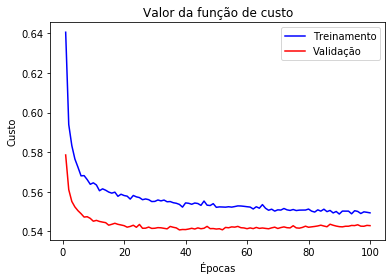

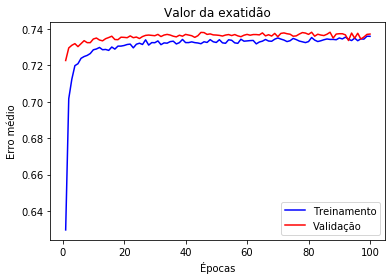

In [43]:
import matplotlib.pyplot as plt

# Definir vetores com valores da função de custo e da métrica para os dados de treinamento e de validação
history_dict = history.history
custo = history_dict['loss']
exatidao = history_dict['accuracy']
custo_val = history_dict['val_loss']
exatidao_val = history_dict['val_accuracy']

# Criar vetor de épocas
epocas = range(1, len(custo) + 1)

# Fazer o gráfico dos valores da função de custo
plt.plot(epocas, custo, 'b', label='Treinamento')
plt.plot(epocas, custo_val, 'r', label='Validação')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Fazer o gráfico dos valores da métrica
plt.plot(epocas, exatidao, 'b', label='Treinamento')
plt.plot(epocas, exatidao_val, 'r', label='Validação')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Erro médio')
plt.legend()
plt.show()


## 9. Avaliação e teste da RNA


### Execício #18: Avaliação da RNA

Apresente a avaliação de desempenho geral para os dados de treinamento, validação e teste (use o método `evaluate`). 

In [46]:
# Para você fazer:

# Avalia desempenho da RNA para os dados de treinamento, validação e teste
# Insire seu código aqui
#

# Apresenta resultados
print('Dados de treinamento: Função de custo =', eval_train[0], '- Exatidão =', eval_train[1])
print('Dados de validação: Função de custo =', eval_val[0], '- Exatidão =', eval_val[1])
print('Dados de teste: Função de custo =', eval_test[0], '- Exatidão =', eval_test[1])

Dados de treinamento: Função de custo = 0.5379229805828467 - Exatidão = 0.73830295
Dados de validação: Função de custo = 0.542898497689854 - Exatidão = 0.73727274
Dados de teste: Função de custo = 0.5475820455551147 - Exatidão = 0.7336364


**Saída esperada:**

    Dados de treinamento: Função de custo = 0.5353194371969623 - Exatidão = 0.73892945
    Dados de validação: Função de custo = 0.5486114514524286 - Exatidão = 0.73072726
    Dados de teste: Função de custo = 0.5468874634179202 - Exatidão = 0.7303636

Observa-se que a RNA acerta se o passageiro tem ou não doença cardiovascular em cerca de 73% dos casos. 

### Exercício #19: Teste da RNA

Apresente alguns exemplos de resultados do conjunto de teste (use o método `predict`). 

Faça um gráfico com as classes reais e previstas sobrepostas com cores diferentes para cerca de 150 exemplos é interessante para verificar os resultados.

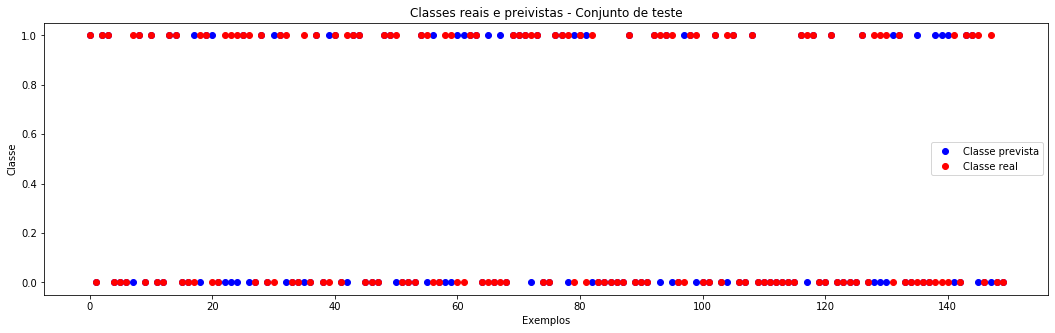

In [48]:
# Para você fazer: Calcula previsão da RNA para os dados de teste

# Cálculo da probabilidade de sobrevivência usando a RNA  
# Insire seu código aqui
#

# Verifica se sobreviveu ou não
# Insire seu código aqui
#

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(18, 5))
plt.plot(classe_prev[:150], 'bo', label='Classe prevista')
plt.plot(y_test[:150], 'ro', label='Classe real')
plt.title('Classes reais e preivistas - Conjunto de teste')
plt.xlabel('Exemplos')
plt.ylabel('Classe')
plt.legend()
plt.show()